In [6]:
import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        if input_img.ndim == 3:
            img_h, img_w, img_c = input_img.shape
        elif input_img.ndim == 2:
            img_h, img_w = input_img.shape

        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            if input_img.ndim == 3:
                c = np.random.uniform(v_l, v_h, (h, w, img_c))
            if input_img.ndim == 2:
                c = np.random.uniform(v_l, v_h, (h, w))
        else:
            c = np.random.uniform(v_l, v_h)
        #slicing the area in randomized pattern
        input_img[top:top + h, left:left + w] = c

        return input_img

    return eraser

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


cols, rows = 5, 4
img_num = cols * rows

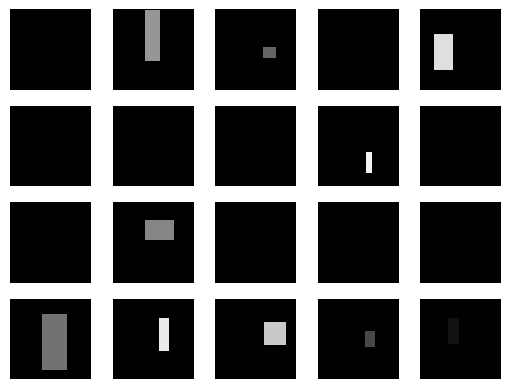

In [8]:
x = np.zeros((img_num, 64, 64, 3), dtype=np.uint8)

eraser = get_random_eraser()

for i in range(img_num):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(eraser(x[i]), interpolation="nearest")
    plt.axis('off')

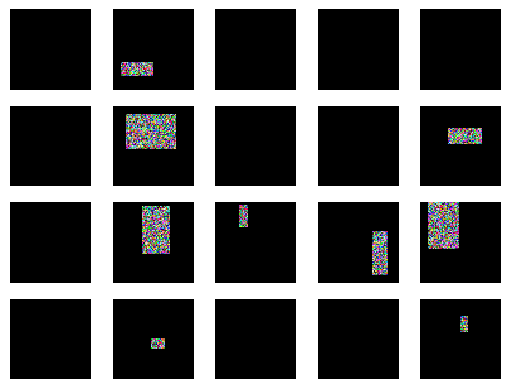

In [11]:
x = np.zeros((img_num, 64, 64, 3), dtype=np.uint8)

eraser = get_random_eraser(pixel_level=True)

for i in range(img_num):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(eraser(x[i]), interpolation="nearest")
    plt.axis('off')
    plt.savefig("example2.png")